# Lab 2 activity Breast Cancer Analysis using kernel SVM
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing our dataset

In [2]:
dataset = pd.read_csv('Breast_Cancer_Analysis.csv')

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Id and Unnamed32 will not be relevant for the SVM kernel analysis, so we will remove them from here for the study

In [4]:
df = dataset.drop(['Unnamed: 32','id'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

From the info function, we see that diagnosis is considered as an object, so M for malignant and B for benign, we will convert those values to be in binary later in the analysis

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Statistic descriptive information

In [7]:
class1= df[df.diagnosis=='M']
class1.shape

(212, 31)

In [8]:
class2 = df[df.diagnosis=='B']
class2.shape

(357, 31)

From this result, we can confirm that we have a 212 malignant and 357 benign cases

In [9]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


With this result, we can observe the mean for each variables regarding malignant or benign tumor.
We observe a strong difference of means regarding the area_mean, we are going to plot it:

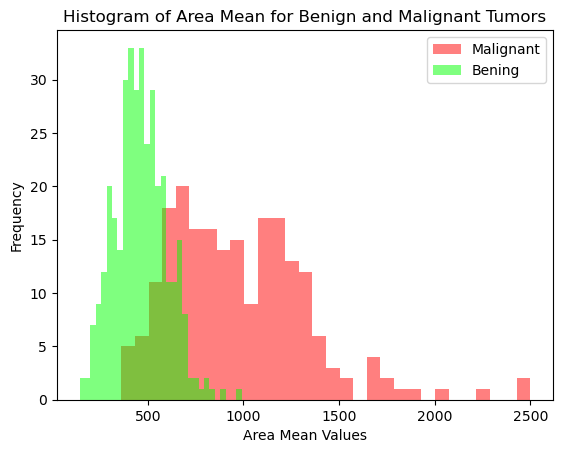

In [10]:
m = plt.hist(df[df["diagnosis"] == "M"].area_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].area_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Area Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Area Mean for Benign and Malignant Tumors")
plt.show()

From the previous analysis, we saw that some values can be grouped together: The mean, standard error and "worst" (mean of the three largest values)
So let's create the three different groups to get a better visualization in our analysis and so later on we can dispense with those values that have the same meaning but are expressed in another way.

In [11]:
features_mean= list(df.columns[1:10])
features_se= df.columns[11:20]
features_worst=df.columns[21:30]
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)


['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']
-----------------------------------
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se'],
      dtype='object')
------------------------------------
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


<AxesSubplot:>

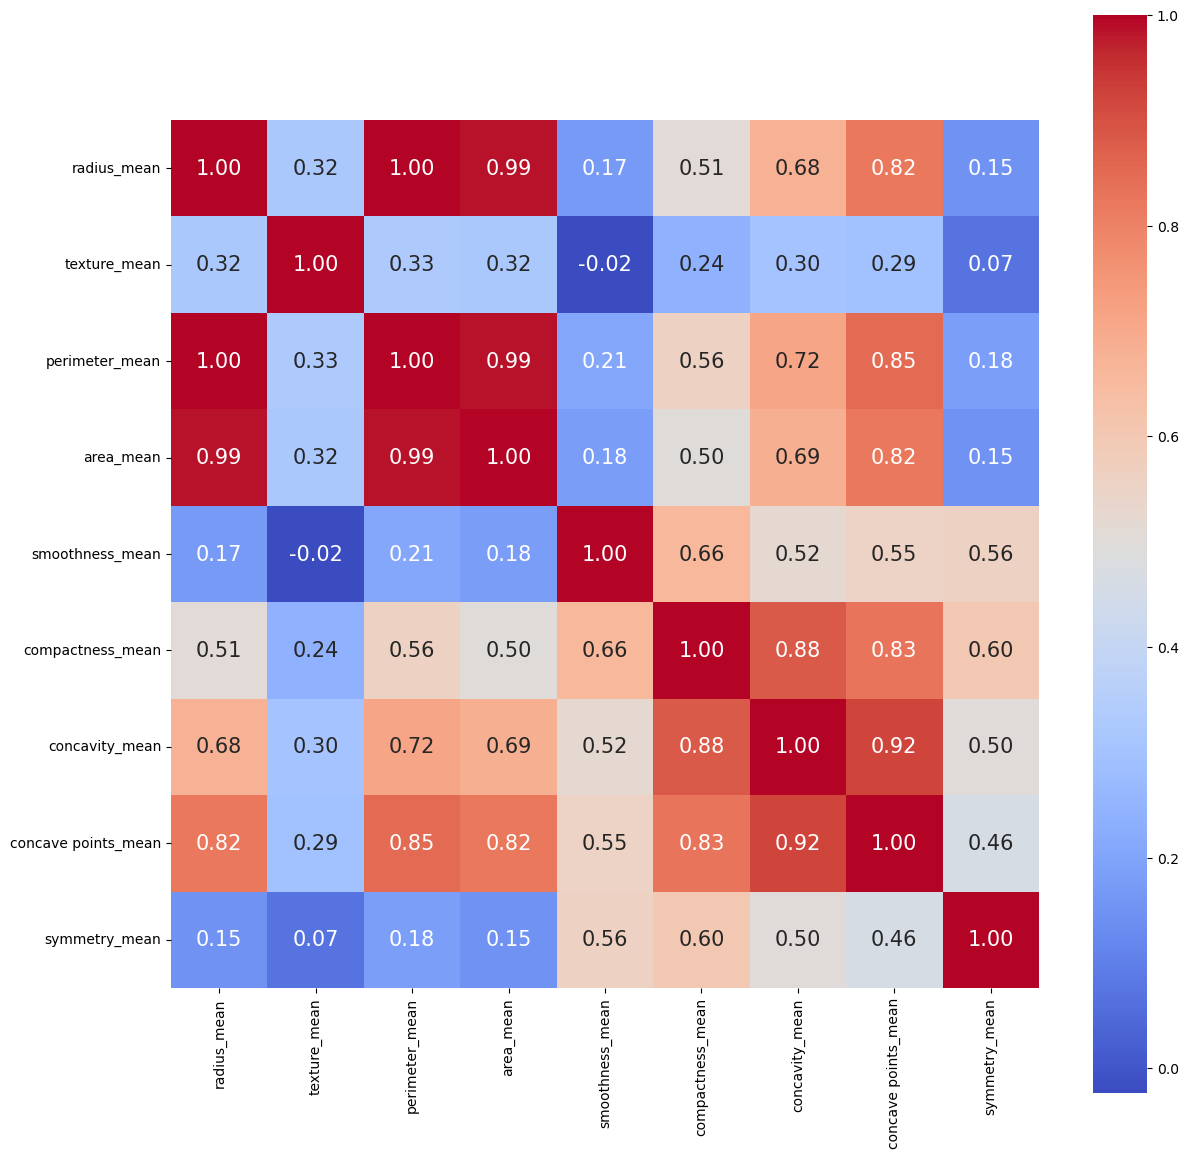

In [12]:
# lets check the correlation between features
# now we will do this analysis only for features_mean it is more interesting for the study 
#to analyse values of the mean rater than standard deviation or "worst" values
corr = df[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

From the correlation matrix we obtain:
- Strong correlation between the radius_mean with area_mean and perimeter_mean this means that for our analysis we will just keep one of these parameters instead of keeping all of them.
- From the texture_mean and symetry_mean we don't see any correlation with other parameters so we will considerate them as unique variables
- Continuing the analysis regarding compactness_mean, concavity_mean and concave points_mean we see a strong correlation coefficients so we will reunite them under concavity_mean.

In [13]:
#we convert the diagnosis variable in a binary variable
cat_feats = ['diagnosis']
df = pd.get_dummies(df,columns=cat_feats,drop_first=True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [14]:
#We readjust the dataset
X = df[['texture_mean','radius_mean','concavity_mean','symmetry_mean']].values
y = df.iloc[:, -1].values

In [15]:
#we split the dataset into the train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
print(X_train)

[[1.746e+01 1.185e+01 2.688e-02 1.875e-01]
 [1.986e+01 1.122e+01 5.006e-03 1.940e-01]
 [2.825e+01 2.013e+01 1.440e-01 1.752e-01]
 ...
 [1.832e+01 9.436e+00 2.710e-02 1.506e-01]
 [1.822e+01 9.720e+00 0.000e+00 1.653e-01]
 [2.393e+01 1.151e+01 1.112e-01 1.388e-01]]


In [17]:
print(y_train)

[0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0]


In [18]:
print(X_test)

[[2.052e+01 1.340e+01 1.445e-01 2.116e-01]
 [2.525e+01 1.321e+01 2.772e-02 1.619e-01]
 [1.566e+01 1.402e+01 2.087e-02 1.589e-01]
 [1.817e+01 1.426e+01 2.475e-02 1.635e-01]
 [1.842e+01 1.303e+01 2.562e-02 1.467e-01]
 [1.861e+01 1.134e+01 4.302e-02 1.927e-01]
 [2.272e+01 1.205e+01 7.943e-02 1.203e-01]
 [1.911e+01 1.170e+01 1.583e-02 1.936e-01]
 [2.549e+01 7.729e+00 0.000e+00 1.870e-01]
 [1.471e+01 1.026e+01 3.581e-02 1.633e-01]
 [1.398e+01 1.469e+01 1.450e-01 2.086e-01]
 [2.402e+01 1.462e+01 3.102e-02 1.685e-01]
 [2.168e+01 9.397e+00 3.735e-02 1.274e-01]
 [1.946e+01 1.684e+01 5.150e-02 1.844e-01]
 [1.524e+01 1.464e+01 9.966e-02 2.116e-01]
 [1.189e+01 1.546e+01 2.032e-01 1.966e-01]
 [1.890e+01 9.042e+00 1.975e-01 2.330e-01]
 [2.781e+01 2.051e+01 1.554e-01 1.448e-01]
 [2.321e+01 1.955e+01 1.856e-01 1.989e-01]
 [2.356e+01 2.094e+01 2.712e-01 2.205e-01]
 [1.870e+01 1.184e+01 1.218e-01 2.301e-01]
 [1.877e+01 1.624e+01 1.948e-01 1.876e-01]
 [1.406e+01 1.347e+01 5.786e-02 1.779e-01]
 [1.894e+01

In [19]:
print(y_test)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


## Feature Scalling

In [20]:
#Import library for standardisation 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print(X_train)

[[-0.43057322 -0.65079907 -0.78763077  0.25404078]
 [ 0.15226547 -0.82835341 -1.06654609  0.48903741]
 [ 2.18977235  1.68277234  0.70576603 -0.19064516]
 ...
 [-0.22172269 -1.33114223 -0.78482555 -1.08001703]
 [-0.24600763 -1.25110186 -1.13037758 -0.54856311]
 [ 1.14066273 -0.74662205  0.28753332 -1.5066263 ]]


In [22]:
print(X_test)

[[ 0.3125461  -0.21395901  0.71214153  1.12533599]
 [ 1.461224   -0.26750714 -0.77691993 -0.67148442]
 [-0.86770223 -0.03922298 -0.86426427 -0.77994441]
 [-0.25815011  0.02841677 -0.8147904  -0.6136391 ]
 [-0.19743774 -0.31823696 -0.80369703 -1.22101501]
 [-0.15129635 -0.79453354 -0.58182968  0.44203809]
 [ 0.84681489 -0.59443261 -0.11756586 -2.17546288]
 [-0.02987162 -0.69307391 -0.92852929  0.47457608]
 [ 1.51950787 -1.81222996 -1.13037758  0.23596412]
 [-1.0984092  -1.09891242 -0.67376437 -0.62086976]
 [-1.2756893   0.14960465  0.71851703  1.01687601]
 [ 1.16251918  0.12987639 -0.73484164 -0.43287246]
 [ 0.59425147 -1.34213369 -0.65412783 -1.91877425]
 [ 0.05512569  0.75554409 -0.47370122  0.14196546]
 [-0.969699    0.13551304  0.14038681  1.12533599]
 [-1.78324465  0.36661552  1.46062508  0.58303607]
 [-0.08087001 -1.44218415  1.38794439  1.89901722]
 [ 2.0829186   1.78986861  0.8511274  -1.28970634]
 [ 0.96581112  1.51930961  1.23620752  0.66618872]
 [ 1.05080843  1.9110565   2.32

## Building the model (with means) and training it

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [24]:
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.9370629370629371

After building our model, we get an accuracy score of 0.93

## Printing the confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
print(cm)

[[85  5]
 [ 4 49]]


In [26]:
print("Malignant:",report['1'])
print("Benign:", report['0'])

Malignant: {'precision': 0.9074074074074074, 'recall': 0.9245283018867925, 'f1-score': 0.9158878504672898, 'support': 53}
Benign: {'precision': 0.9550561797752809, 'recall': 0.9444444444444444, 'f1-score': 0.9497206703910613, 'support': 90}


Text(95.72222222222221, 0.5, 'Truth')

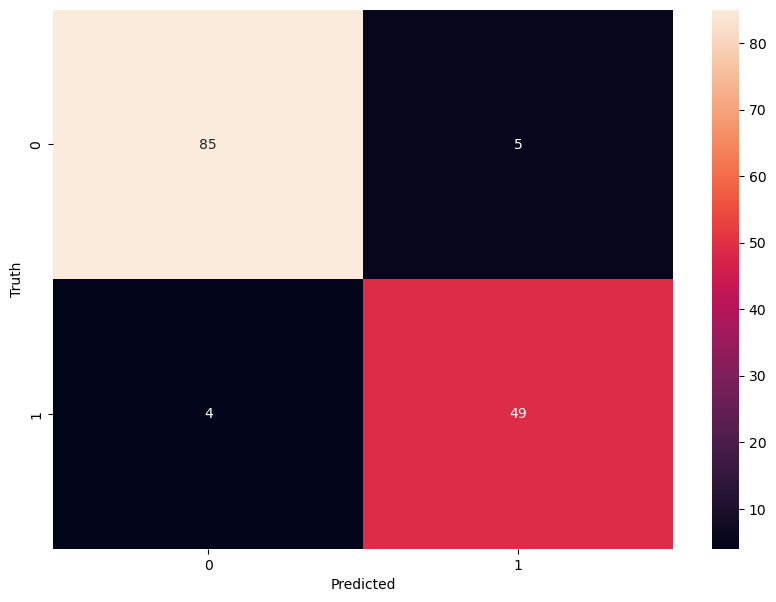

In [27]:
%matplotlib inline 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

From our confusion matrix we obtain:
- 85 patients considered as having a benign tumor (true negatives)
- 5 patients considered as having a malign tumor but in reality it is not (false positives)
- 4 patients considered as having a benign tumor but in reality it is not (false negatives)
- 85 patients considered as having a malign tumor (true positives)